In [136]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [295]:
img = cv2.imread("images/test.jpg")

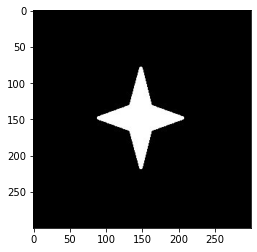

In [296]:
plt.imshow(img)

In [297]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127,255,0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [298]:
len(contours[0])
cnt = contours[0]

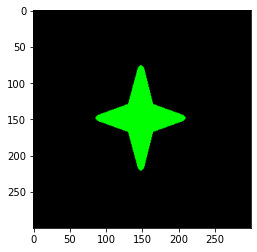

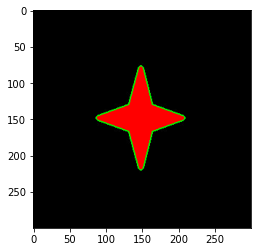

In [301]:
plt.imshow(cv2.drawContours(img,contours,-1,(0,255,0),-1))
plt.show()
plt.imshow(cv2.drawContours(img,[cnt],0,(255,0,0),-1))

In [388]:
img2 = cv2.imread("images/balls.png")
imgray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 63,255,0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

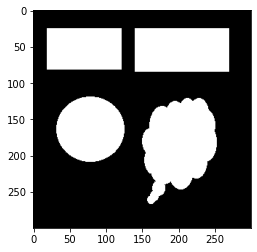

In [389]:
plt.imshow(thresh, cmap="gray")

In [393]:
len(contours)
cnt = contours[3]
len(contours)
len(cnt)

4

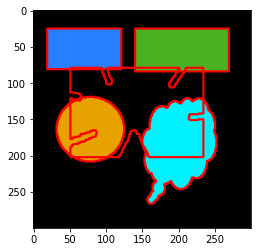

In [405]:
plt.imshow(cv2.drawContours(img2, contours, -1,(255,0,0),2))

In [345]:
moments = cv2.moments(cnt)
moments

{'m00': 10033.5,
 'm10': 2010061.8333333333,
 'm01': 1850134.5,
 'm20': 409360323.5833333,
 'm11': 368666693.125,
 'm02': 352044973.5833333,
 'm30': 84692116672.95001,
 'm21': 74691021944.88333,
 'm12': 69763579350.98334,
 'm03': 68983799276.15001,
 'mu20': 6674463.831166983,
 'mu11': -1980114.5675549507,
 'mu02': 10888082.359906793,
 'mu30': 8633090.369003296,
 'mu21': 101313.30416250229,
 'mu12': -33122544.260385513,
 'mu03': 52779711.29989624,
 'nu20': 0.06629968636479547,
 'nu11': -0.019669141689288665,
 'nu02': 0.10815497152071127,
 'nu30': 0.0008561209988226333,
 'nu21': 1.0046975468372928e-05,
 'nu12': -0.0032846761082870463,
 'nu03': 0.005234025965704581}

In [437]:
cnt = contours[0]
area = cv2.contourArea(cnt)
area

20612.5

In [434]:
perimeter = cv2.arcLength(cnt,True)
perimeter

938.4924212694168

In [360]:
approx = cv2.approxPolyDP(cnt,0.1*cv2.arcLength(cnt,True),True)
plt.imshow(cv2.drawContours(img2, approx, -1,(0,255,0),3))
plt.show()

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\drawing.cpp:2501: error: (-215:Assertion failed) npoints > 0 in function 'cv::drawContours'


In [359]:
approx

array([[[ 19,  25]],

       [[ 19,  81]],

       [[121,  81]],

       [[121,  25]]], dtype=int32)

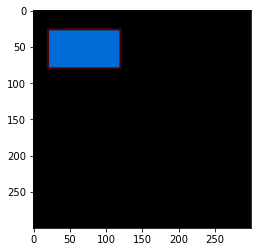

In [225]:
images = []
i = 0
for h,cnt in enumerate(contours):
    mask = np.zeros(imgray.shape,np.uint8)
    im = cv2.drawContours(mask,[cnt],0,255,-1)
    images.append(im)
    mean = cv2.mean(img2, mask = mask)
    plt.imshow(cv2.bitwise_and(img2,mean,mask = mask))
    if i == 3: break
    i = i + 1

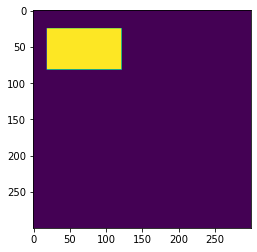

In [226]:
plt.imshow(mask)

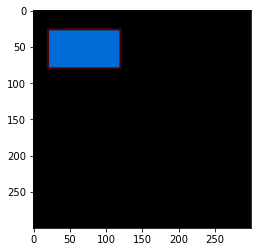

In [227]:
plt.imshow(cv2.bitwise_and(img2,mean,mask = mask))

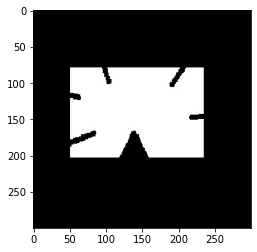

In [419]:
img3 = cv2.imread("images/3.jpg")
imgray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
plt.imshow(img3)

In [415]:
ret, thresh = cv2.threshold(imgray3, 64, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#plt.imshow(cv2.drawContours(img3,contours,-1,(0,255,0),3))

In [438]:
len(contours[0])
cnt = contours[0]

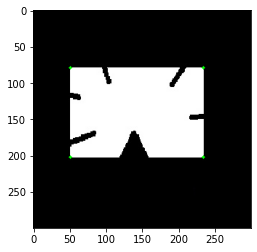

In [420]:
approx = cv2.approxPolyDP(cnt, 0.1*cv2.arcLength(cnt,True),True)
plt.imshow(cv2.drawContours(img3,approx,-1,(0,255,0),3))
plt.show()

In [382]:
hull = cv2.convexHull(approx)

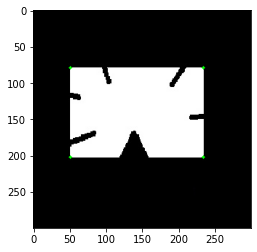

In [422]:
plt.imshow(cv2.drawContours(img3,hull,-1,(0,255,0),3))
plt.show()

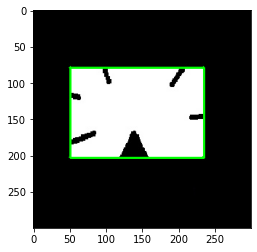

In [423]:
x,y,w,h = cv2.boundingRect(hull)
plt.imshow(cv2.rectangle(img3,(x,y),(x+w,y+h),(0,255,0),2))

In [293]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 100:
        cv2.drawContours(img,[cnt],0,(0,255,0),3)

In [294]:
approx

array([[[51, 79]]], dtype=int32)

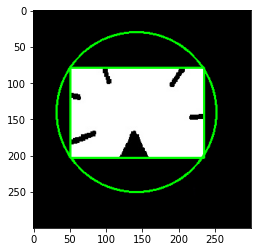

In [432]:
(x,y),radius = cv2.minEnclosingCircle(hull)
center = (int(x),int(y))
radius = int(radius)
plt.imshow(cv2.circle(img3,center,radius,(0,255,0),2))

In [439]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])